CASE STUDY ON UNSUPERVISED LEARNING
The Whole sale customer data is given
1. Read the dataset to the python environment.
2. Try out different clustering models in the Whole sale customer dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.
4. Perform PCA for Dimensionality reduction.

In [ ]:
###Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [2]:
df= pd.read_csv(r"C:\Users\Vijesh\Downloads\Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Analysis of dataset

In [3]:
# understand basic details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
# Check for null values in dataset
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
#list the columns name
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
#check whether duplicated values are there?
print("duplicated values: ",df.duplicated().sum())

duplicated values:  0


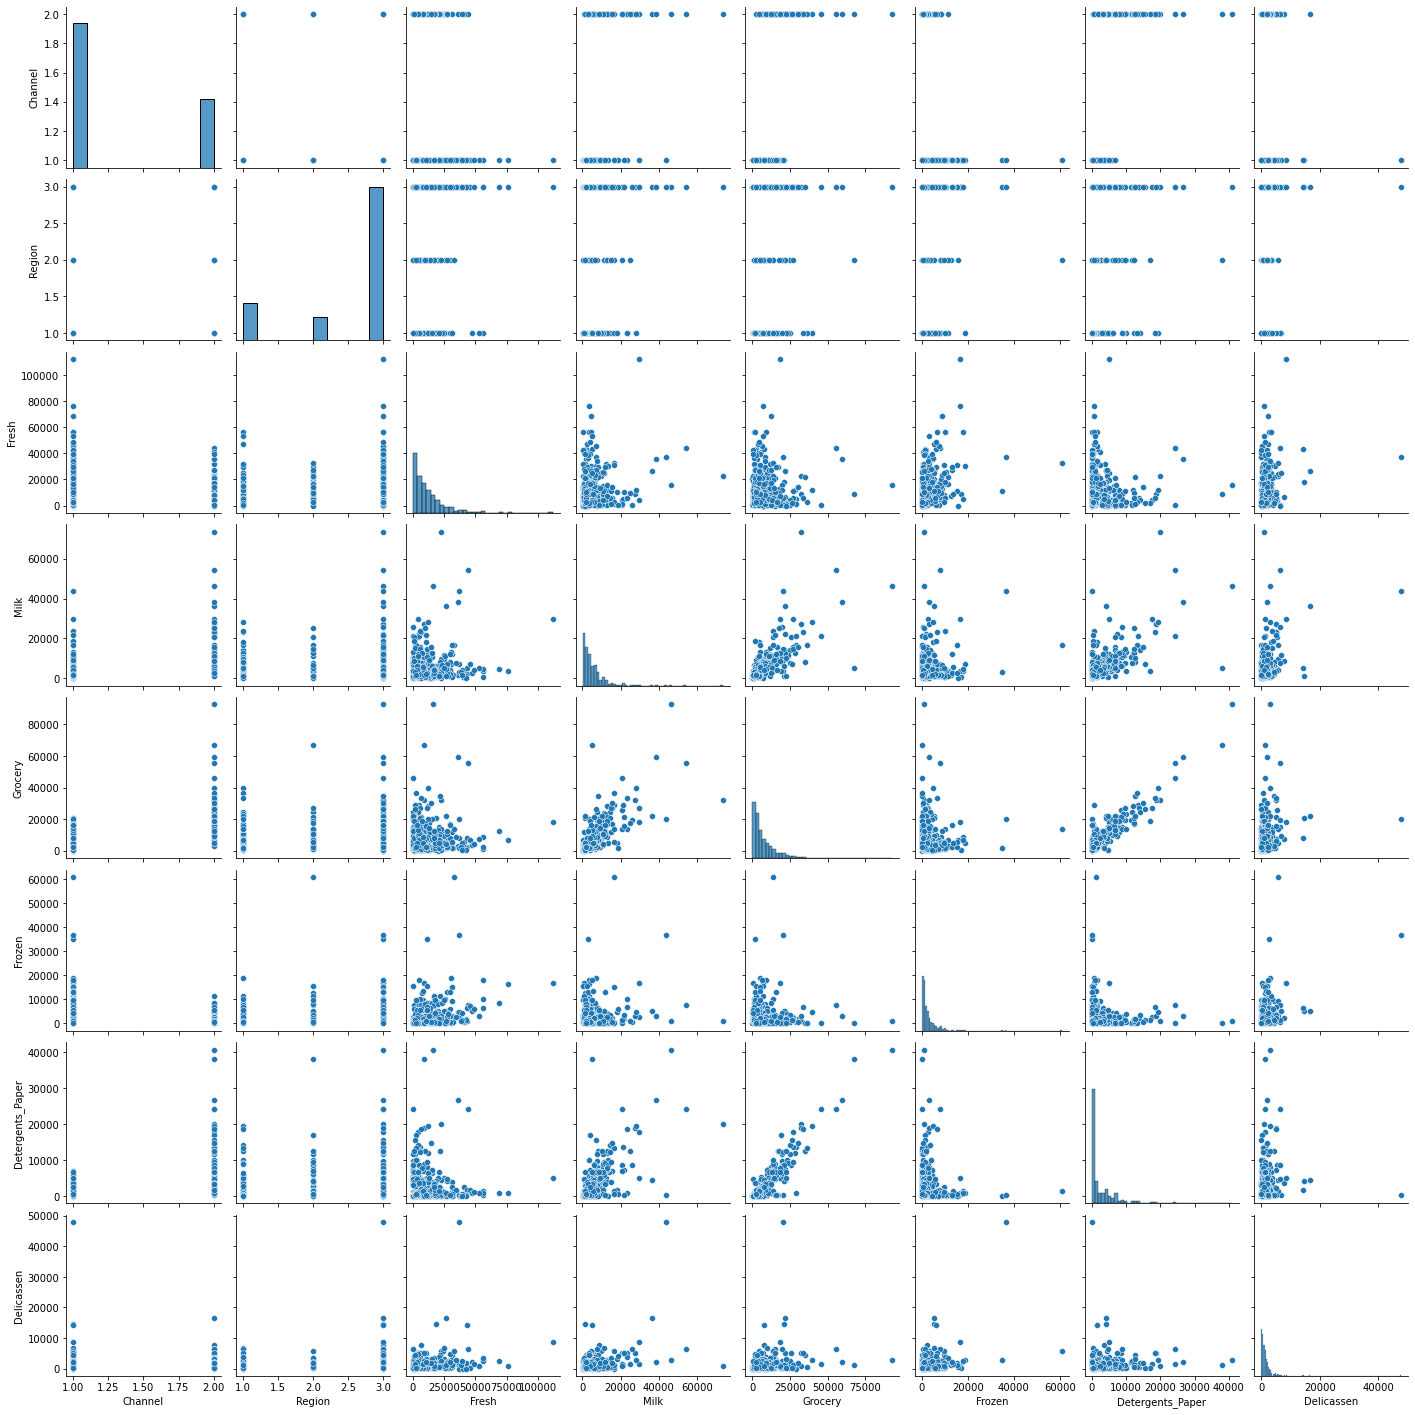

In [7]:
#Data Visualization
sns.pairplot(df)
plt.show()

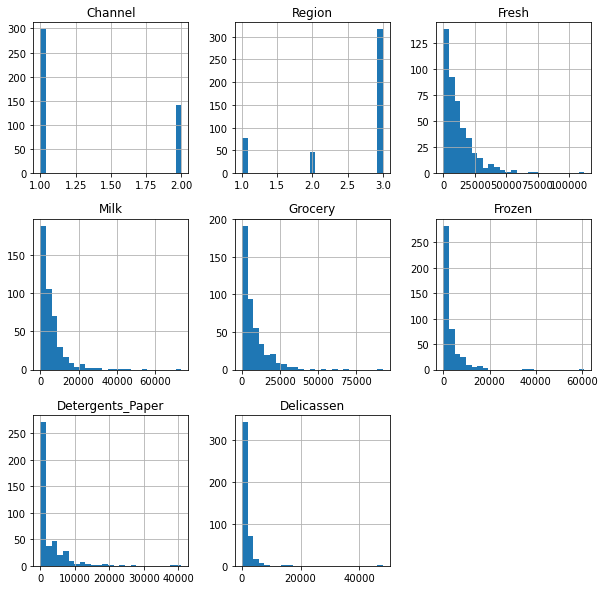

In [8]:
#Histogram
df.hist(bins=25,figsize=(10,10))
plt.show()

In [9]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


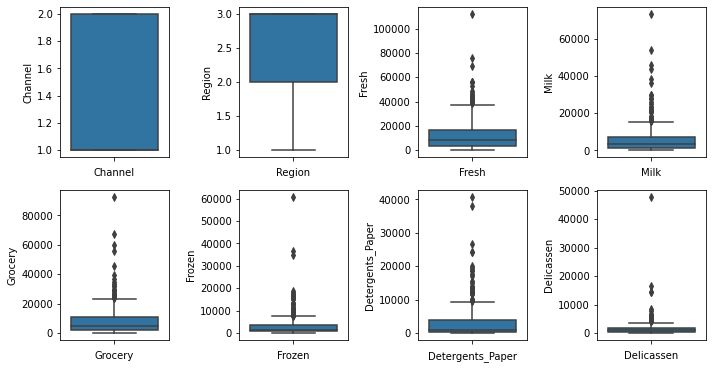

In [11]:
#plotting the columns for checking there any outliers in it
fig = plt.figure(figsize=(10,10))
for i in range(len(df.columns)):
    fig.add_subplot(4,4,i+1)
    sns.boxplot(y=df.iloc[:,i])
    plt.xlabel(df.columns[i])
plt.tight_layout()
plt.show()

In [33]:
# Making a Correlation Matrix

plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), annot=True, linewidths=0.2, cmap='YlGnBl');

ValueError: 'YlGnBl' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<Figure size 864x720 with 0 Axes>

In [34]:
df=df.drop(['Channel','Region'],axis=1)

#### Scaling of dataset

In [35]:
# Standard scaling our dataset.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = sc.fit_transform(df)

#### K-Means

In [36]:
from sklearn.cluster import KMeans

# Using Scaled data

inertia = []
for k in range(1,20):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertia.append(model.inertia_)
    
print(inertia)

C:\Users\Vijesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2640.0, 1954.802027461528, 1604.0162997180876, 1312.5246032068283, 1058.7712532570085, 917.5531339464205, 824.977492106857, 746.3209679822395, 667.3839725947892, 612.7628844502608, 554.9322015463323, 548.4052588379994, 489.66034351471126, 464.881540948694, 427.68826643001324, 407.6612504157937, 383.8011541290004, 361.101932326775, 347.65491420383074]


Text(0, 0.5, 'Inertia')

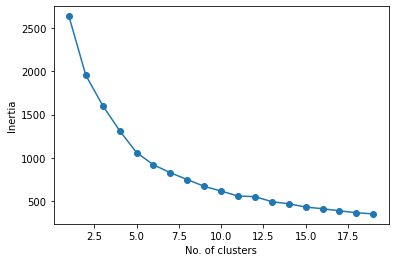

In [37]:
plt.plot(range(1,20),inertia,'-o')
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")

In [38]:
# Creating a model with 5 optimum clusters on scaled data

kmeans_s = KMeans(n_clusters=5)
kmeans_s.fit(scaled_df)
label_s = kmeans_s.predict(scaled_df)
print(label_s)

[2 4 4 2 1 2 2 2 2 4 4 2 1 4 4 2 4 2 2 2 2 2 1 4 4 2 2 2 4 1 2 2 2 1 2 4 1
 4 4 1 1 2 4 4 4 4 4 0 4 4 2 2 1 4 2 2 0 4 2 2 2 0 2 4 2 0 2 4 2 2 1 1 2 1
 2 2 2 4 2 2 2 4 4 2 2 0 0 1 2 1 2 2 0 1 4 2 2 2 2 2 4 4 2 1 2 2 4 4 2 4 2
 4 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 4 2 2
 2 1 2 2 2 2 2 4 4 2 2 4 4 2 2 4 2 4 4 2 2 2 4 4 2 4 2 4 1 2 2 2 2 1 4 3 2
 2 2 2 4 4 2 2 2 4 2 1 1 4 2 2 4 4 1 2 2 4 2 2 2 4 2 0 2 2 4 4 4 2 4 2 2 4
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 4 4 2 2 2 2 2 0 2 1 4 1 2 2 1
 1 2 2 2 2 4 4 4 2 4 2 2 2 2 1 2 2 1 1 2 2 2 2 1 1 1 1 2 2 2 1 2 2 2 4 2 2
 2 2 2 2 2 4 4 4 4 4 4 2 2 4 2 1 4 2 2 4 2 2 2 4 2 2 2 2 2 1 2 2 2 2 2 4 2
 0 1 1 2 2 2 2 4 4 2 4 2 2 4 1 2 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 4 1 2 2 1 1 1 2 4 2 2 2 2 2 2 2 2 1 2 2 4 2 2 2 2 1 2 2 2 2 1
 4 2 2 2 2 2 1 2 2 4 2 4 2 4 2 2 2 2 1 4 1 2 2 2 1 2 2 2 1 1 4 2 2]


In [39]:
# Creating a model with 4 optimum cluster on scaled data.

kmeans_s1 = KMeans(n_clusters=4)
kmeans_s1.fit(scaled_df)
label_s1 = kmeans_s1.predict(scaled_df)
print(label_s1)

[0 3 3 0 0 0 0 0 0 3 3 0 3 3 3 0 3 0 0 0 0 0 0 2 3 0 0 0 3 0 0 0 0 0 0 3 0
 3 3 0 0 0 3 3 3 3 3 1 3 3 0 0 0 3 0 0 1 3 0 0 0 1 0 3 0 1 0 3 0 0 0 3 0 0
 0 0 0 3 0 0 0 3 3 0 0 1 1 2 0 0 0 0 1 0 3 0 0 0 0 0 3 3 3 0 0 0 3 3 3 3 0
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0 3 0 3 0 0 0 0 0 2 3 2 0
 0 0 3 3 3 0 0 0 3 0 0 0 3 0 0 3 3 0 0 0 3 0 0 0 3 0 1 0 3 3 3 3 0 3 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 1 0 0 3 0 0 0 0
 0 0 0 0 0 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 3 0 0 3 3 3 3 3 3 0 0 3 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 3 0
 1 0 0 0 0 0 0 3 3 3 3 0 0 3 0 0 3 0 3 0 3 0 0 0 3 3 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 3 0 0 0 3 3 3 0 3 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0]


In [40]:
# Creating a model with 6 optimum cluster on scaled data.

kmeans_s2 = KMeans(n_clusters=6)
kmeans_s2.fit(scaled_df)
label_s2 = kmeans_s2.predict(scaled_df)
print(label_s2)

[0 2 2 0 4 0 0 0 0 2 2 0 4 2 2 0 2 0 0 0 0 0 4 2 4 0 0 0 2 4 0 0 0 4 0 2 4
 2 2 4 4 0 2 2 2 2 2 1 2 2 0 0 4 2 4 0 1 2 0 0 0 1 0 2 0 1 0 2 0 0 0 4 0 0
 0 0 0 2 0 0 0 2 2 0 0 1 1 4 0 4 0 0 1 3 2 0 0 0 0 0 2 2 0 4 0 0 2 2 0 2 0
 2 4 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 2 0 0
 0 4 0 0 0 0 0 2 2 0 2 2 2 0 0 2 0 2 2 0 0 0 2 2 0 2 0 2 4 0 0 0 0 4 2 5 0
 0 0 0 2 2 0 0 0 2 0 0 4 2 0 0 2 2 4 0 0 2 0 0 0 2 0 1 0 0 2 2 2 0 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 2 2 0 0 0 0 0 1 0 4 2 4 0 0 4
 4 0 0 0 0 2 2 2 0 2 0 0 0 0 4 0 0 4 0 0 0 0 0 4 4 4 4 0 0 0 4 0 0 0 2 0 0
 0 0 0 0 0 2 2 2 2 2 2 0 0 2 0 4 2 0 0 2 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 2 0
 1 4 4 0 0 0 0 2 2 0 2 0 0 2 4 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 4 0 0 0 0 0 2 4 0 0 4 0 4 0 2 0 0 0 0 0 0 0 0 4 0 0 2 0 0 0 0 4 0 0 0 0 4
 2 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 4 0 0 0 0 0 0 0 4 4 2 0 0]


In [41]:
# Creating a model with 7 optimum cluster on scaled data.

kmeans_s3 = KMeans(n_clusters=7)
kmeans_s3.fit(scaled_df)
label_s3 = kmeans_s2.predict(scaled_df)
print(label_s3)

[0 2 2 0 4 0 0 0 0 2 2 0 4 2 2 0 2 0 0 0 0 0 4 2 4 0 0 0 2 4 0 0 0 4 0 2 4
 2 2 4 4 0 2 2 2 2 2 1 2 2 0 0 4 2 4 0 1 2 0 0 0 1 0 2 0 1 0 2 0 0 0 4 0 0
 0 0 0 2 0 0 0 2 2 0 0 1 1 4 0 4 0 0 1 3 2 0 0 0 0 0 2 2 0 4 0 0 2 2 0 2 0
 2 4 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 2 0 0
 0 4 0 0 0 0 0 2 2 0 2 2 2 0 0 2 0 2 2 0 0 0 2 2 0 2 0 2 4 0 0 0 0 4 2 5 0
 0 0 0 2 2 0 0 0 2 0 0 4 2 0 0 2 2 4 0 0 2 0 0 0 2 0 1 0 0 2 2 2 0 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 2 2 0 0 0 0 0 1 0 4 2 4 0 0 4
 4 0 0 0 0 2 2 2 0 2 0 0 0 0 4 0 0 4 0 0 0 0 0 4 4 4 4 0 0 0 4 0 0 0 2 0 0
 0 0 0 0 0 2 2 2 2 2 2 0 0 2 0 4 2 0 0 2 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 2 0
 1 4 4 0 0 0 0 2 2 0 2 0 0 2 4 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 4 0 0 0 0 0 2 4 0 0 4 0 4 0 2 0 0 0 0 0 0 0 0 4 0 0 2 0 0 0 0 4 0 0 0 0 4
 2 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 4 0 0 0 0 0 0 0 4 4 2 0 0]


In [42]:
from sklearn.metrics import silhouette_score
# Checking the silhouette_score of both models

print(f'Silhouette Score(n=5): {silhouette_score(scaled_df, label_s)}')

print(f'\nSilhouette Score(n=4): {silhouette_score(scaled_df, label_s1)}')

print(f'\nSilhouette Score(n=6): {silhouette_score(scaled_df, label_s2)}')

print(f'\nSilhouette Score(n=7): {silhouette_score(scaled_df, label_s3)}')

Silhouette Score(n=5): 0.36904038268128087

Silhouette Score(n=4): 0.34847138657014315

Silhouette Score(n=6): 0.37653496358342414

Silhouette Score(n=7): 0.37653496358342414


##### n=6 has nighest score, optimum number of cluster is 6 or 7 


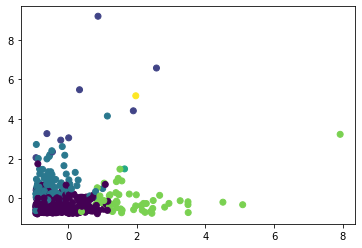

In [43]:
y_kmeans=pd.DataFrame(label_s2)
plt.scatter(scaled_df[:,0],scaled_df[:,1],c=y_kmeans)

In [44]:
#

### Using Silhoutte Score 

In [45]:
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.40028869875789824
For n_clusters = 3 The average silhouette_score is : 0.48825746052364977
For n_clusters = 4 The average silhouette_score is : 0.5196833924138705
For n_clusters = 5 The average silhouette_score is : 0.5953486775015351
For n_clusters = 6 The average silhouette_score is : 0.705694905749099
For n_clusters = 7 The average silhouette_score is : 0.7855435151423282


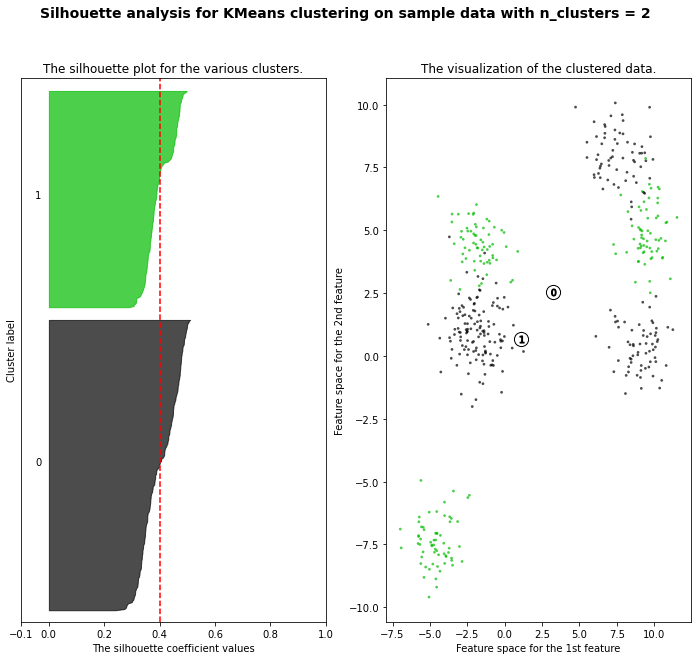

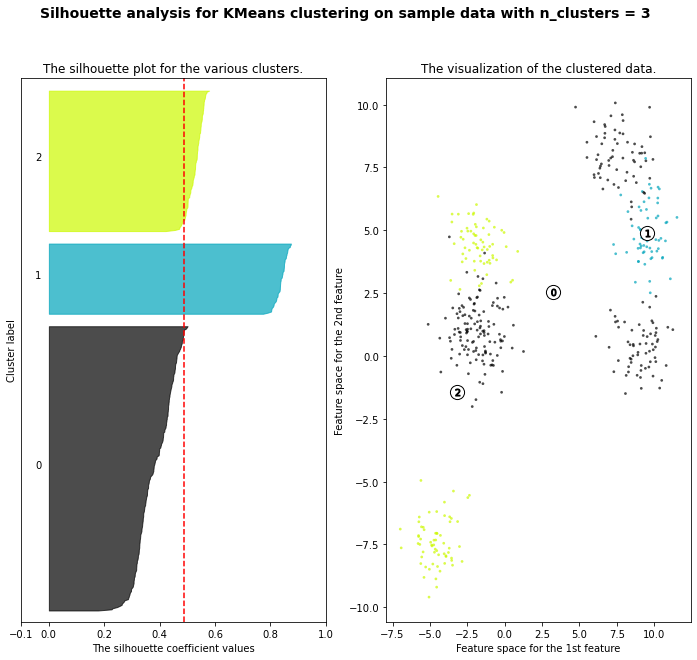

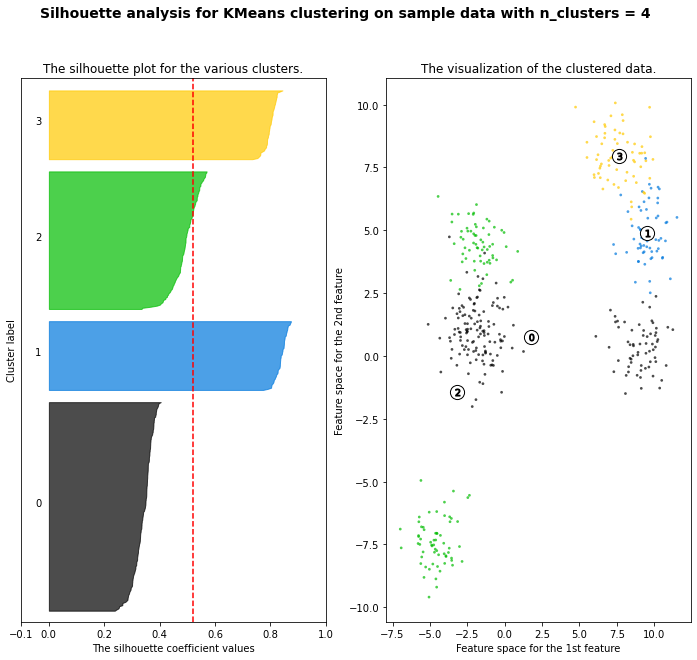

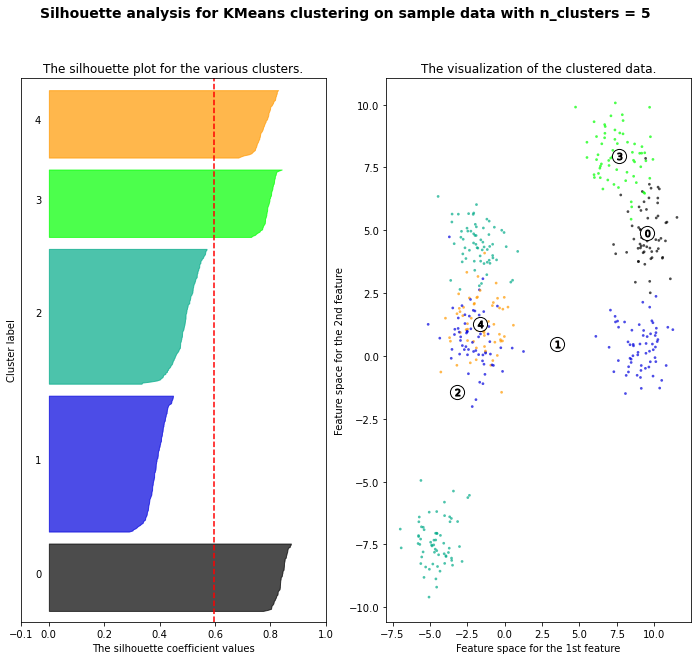

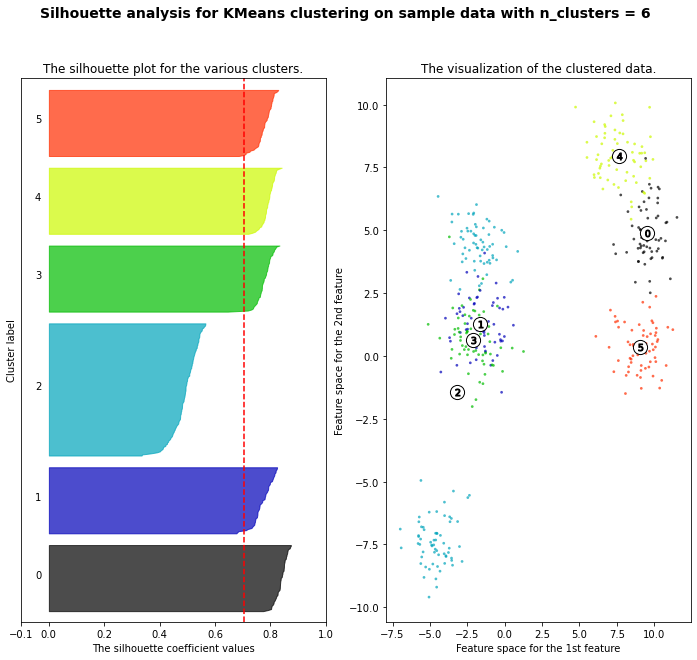

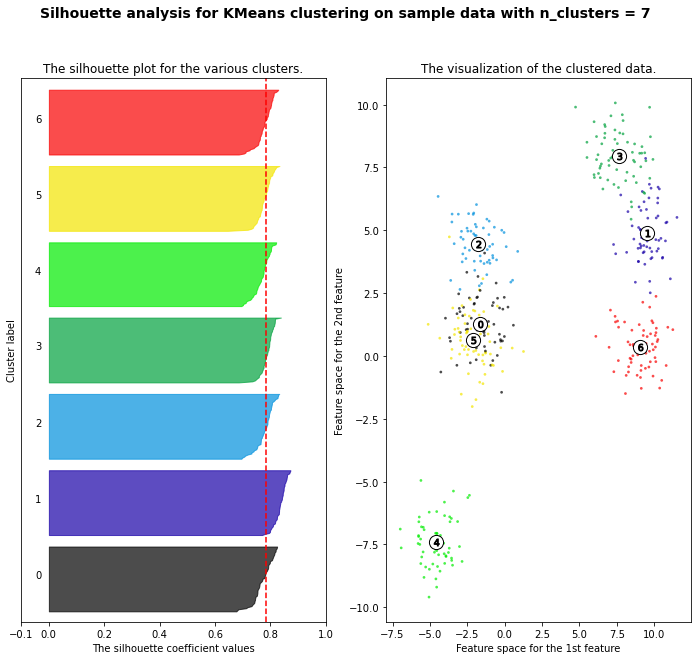

In [46]:

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=440,
    n_features=8,
    centers=7,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12,10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

By this silhoeutte samples method optimal number of cluster is 7.
 
 Implement KMeans modelling using n =7

In [47]:
df_kmeans = KMeans(n_clusters =7, init ='k-means++', random_state = 0)
df_pred = df_kmeans.fit_predict(X)
df_pred

array([1, 6, 4, 0, 5, 1, 4, 5, 6, 4, 0, 4, 2, 6, 3, 3, 4, 0, 4, 5, 3, 3,
       5, 5, 5, 6, 6, 6, 0, 6, 4, 6, 2, 2, 1, 0, 1, 6, 0, 2, 2, 3, 4, 2,
       3, 0, 3, 6, 6, 6, 0, 1, 1, 3, 0, 5, 6, 2, 5, 1, 6, 3, 3, 2, 4, 1,
       4, 5, 6, 0, 0, 1, 2, 5, 0, 6, 3, 5, 1, 4, 5, 1, 1, 0, 1, 4, 5, 5,
       4, 3, 0, 5, 3, 0, 2, 3, 0, 2, 2, 3, 3, 3, 1, 5, 1, 5, 3, 0, 6, 6,
       1, 1, 2, 1, 4, 6, 4, 4, 3, 1, 2, 6, 6, 3, 5, 4, 4, 6, 5, 4, 6, 5,
       4, 2, 3, 5, 6, 3, 5, 1, 6, 3, 2, 5, 2, 4, 6, 1, 1, 2, 1, 4, 3, 3,
       6, 1, 1, 0, 4, 4, 4, 5, 3, 1, 1, 6, 3, 0, 5, 1, 1, 3, 0, 6, 0, 5,
       1, 2, 2, 5, 1, 3, 6, 5, 5, 6, 1, 2, 3, 0, 2, 2, 3, 5, 3, 0, 0, 3,
       2, 6, 6, 2, 3, 0, 5, 5, 4, 1, 6, 0, 4, 2, 6, 1, 2, 6, 1, 1, 0, 4,
       1, 3, 1, 2, 2, 6, 3, 4, 6, 0, 3, 6, 2, 1, 2, 3, 3, 0, 6, 4, 4, 6,
       0, 4, 5, 2, 0, 0, 3, 4, 6, 3, 1, 4, 0, 6, 4, 1, 2, 4, 4, 5, 3, 4,
       2, 5, 5, 5, 2, 0, 0, 4, 4, 2, 1, 5, 3, 5, 4, 0, 4, 1, 6, 6, 6, 6,
       1, 4, 5, 2, 5, 0, 2, 0, 5, 5, 1, 2, 2, 4, 4,

In [48]:
# reiterating the values of highest silhouette score
print(f'\nSilhouette Score(n=7): {silhouette_score(X,df_pred)}')


Silhouette Score(n=7): 0.7855435151423282


In [49]:
scaled_df

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [50]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_df= scalar.fit_transform(df)

In [51]:
scaled_df

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [52]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

In [53]:
scaled_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [54]:
from sklearn.decomposition import PCA
pca=PCA(n_components= 2)
pca.fit(scaled_df)
x_pca=pca.transform(scaled_df)

In [55]:
x_pca.shape

(440, 2)

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

In [57]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  ])

In [58]:
pd.DataFrame(pca.components_, columns=scaled_d.columns , index = ['PC-1','PC-2'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC-1,0.042884,0.545118,0.579256,0.051189,0.548640,0.248682
PC-2,0.527932,0.083168,-0.146088,0.611278,-0.255233,0.504207
